In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup


In [44]:
main_df = pd.read_csv('reviews.csv')

In [45]:
main_df.sample(20)

,review_id,product_id,review_title,review_body,sentiment
30589,2855316,B000E6EHE0,Hilarious,Ryan Reynolds is so funny! This movie is real...,Positive
1733,1285584,B00JOT3HQ2,this game is addicting!,I love this game so much! I have played it for...,Positive
24439,1107057,B00CEBKMN8,fun addictive arcade,This arcade coin game is one of the best avail...,Positive
35995,2623007,B000089QAP,Good introduction to stability ball work....,"I am new at ball work, this program is a good ...",Positive
32063,3416419,B007EQR0D8,Surprisingly good.,Took this on a lark and found it quite good. N...,Positive
4673,72991,B006UIBGUO,Works well,Bought this so my phone wouldn't get so lost i...,Positive
23245,2046384,0800100816,WHO IS THE REAL WILLIE STARK?,THIS REVIEW IS BEING USED FOR BOTH THE SEAN PE...,Positive
14062,482928,B008JSJ9HU,Grotesquely Overpriced,"""Magnesium oil"" is just magnesium chloride dis...",Negative
32923,1303619,B0098DFNY8,Work great!,Ordered a set of these to put 2 on my Ibanez a...,Positive
33620,2260502,6303430910,3 1/2 stars for a character driven historical ...,"Fresh off his success in ""A Streetcar Named De...",Positive


In [46]:
main_df.shape

(50000, 5)

### Imbalance class dataset. we will need re-sampling method for the minority class for training dataset later!

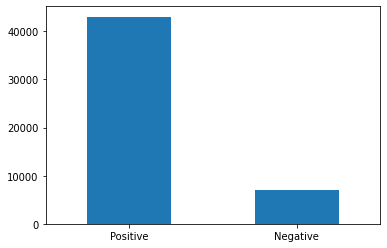

Positive    43041
Negative     6959
Name: sentiment, dtype: int64


In [47]:
main_df['sentiment'].value_counts().plot(kind = 'bar',rot = 0)
plt.show()
print(main_df['sentiment'].value_counts())

In [48]:
main_df[main_df['review_body'].isnull()]

,review_id,product_id,review_title,review_body,sentiment
1472,3715222,B005HUVYBW,BUYER BEWARE: This food is seriously below th...,NaN,Negative
6312,3106557,B001NMT8FW,Trailer for Improvisation Toolkit Volume 1,NaN,Positive
14606,3381749,B005NFJAWG,The Wire: Complete Series,NaN,Positive
17753,3647837,B0010Y5G7W,Big Tuff Lobster,NaN,Positive
17925,130453,B009RXU59C,Slick Design,NaN,Positive
18988,3675719,B002CJIPEK,Dogs Love It!,NaN,Positive
24348,1745894,B000VK3TES,Impressed and disappointed all at the same time,NaN,Negative
26167,141888,B00AJHUNZ6,Makes your phone looks very cool,NaN,Positive
39286,187541,B00H99DB8S,"Great, stylish, portable power for your mobile...",NaN,Positive


In [49]:
main_df = main_df.fillna('')

### Combining title and body for review analysis

In [50]:
main_df['review'] = main_df['review_title']+' ' + main_df['review_body']

In [51]:
n = np.random.randint(0,50000)
print(n,':')
print(main_df['review'][n])

40781 :
a bit wacky What's not to like for $.99? unfortunately it went rather quickly.  some of the associations approach rude. also had some 'britishisms'.


### Non-english language spotted

In [53]:
main_df['review'][6915]

'EXCELENTE UNA EXCELENTE HISTORIA MUY INTERESANTE EL UNICO DEFECTO QUE TIENE LA PELICULA ES UNA VEZ MAS QUE LA PELICULA NO TIENE SUB TITULOS EN ESPA&Ntilde;OL ALGO RARO PUESTO QUE LA PELICULA ESTA EN ESPANGLISH EL RESTO ES IMPERDIBLE MUY INTERSANTE PERO POR FAVOR HAY QUE HACER ALGO CON LOS SUBTITULOS'

### Review contain html tags, can use BeatifulSoup's html parser to remove it

In [55]:
main_df['review'][26382]

"I think I'm in heaven!! You think you know what a good DVD or DVD set IS? If you don't have this, and if you don't get it...you don't. This is the kind of set you buy a DVD player for. All 22 second season episodes of the Simpsons are in this set. Among my favorites are &quot;Bart Gets An F&quot;, &quot;Bart's Dog Gets An F&quot;, &quot;Itchy &amp; Scratchy &amp; Marge&quot;, &quot;The Way We Was&quot;, &quot;Old Money&quot;, &quot;O Brother, Where Art Thou?&quot;, and &quot;Principle Charming&quot;. These are classic, must have Simpsons episodes. I have been watching since I was 4-5, and now, finally this great show is available to own on DVD. You get well worth your money, in fact, this set could be worth 40 bucks, I'd pay it! It's a whole season that made television history. America's favorite family came into their own with this season. This is the season that made America fall in love with the Simpsons. As bonus features go, I rate this DVD 5 stars. You get two Bart Simpson music

In [56]:
cleantext = BeautifulSoup(main_df['review'][26382],'html.parser').text
cleantext

'I think I\'m in heaven!! You think you know what a good DVD or DVD set IS? If you don\'t have this, and if you don\'t get it...you don\'t. This is the kind of set you buy a DVD player for. All 22 second season episodes of the Simpsons are in this set. Among my favorites are "Bart Gets An F", "Bart\'s Dog Gets An F", "Itchy & Scratchy & Marge", "The Way We Was", "Old Money", "O Brother, Where Art Thou?", and "Principle Charming". These are classic, must have Simpsons episodes. I have been watching since I was 4-5, and now, finally this great show is available to own on DVD. You get well worth your money, in fact, this set could be worth 40 bucks, I\'d pay it! It\'s a whole season that made television history. America\'s favorite family came into their own with this season. This is the season that made America fall in love with the Simpsons. As bonus features go, I rate this DVD 5 stars. You get two Bart Simpson music video: "Deep, Deep Trouble" (such a good song!!) & "Do The Bartman" (

### One-hot encoding for sentiment classes

In [57]:
main_df['sentiment'] = main_df['sentiment'].replace(['Positive','Negative'],[1,0])

In [58]:
senti = main_df[['review','sentiment']]
senti

,review,sentiment
0,"""The Hunger Games"" is a Well-Constructed ""Chim...",1
1,GREAT!!!!! this game is the best game I have e...,1
2,"Satisfied Customers It's comfortable, it's lig...",1
3,The Greatest!!!! THIS GAME IS REALLY GREAT YOU...,1
4,"Love the movie! Great Adam Sandler movie, a cl...",1
...,...,...
49995,Really don't care for this game. I have tried ...,0
49996,I loved it! I enjoyed watching this movie very...,1
49997,"Very Good! I'm from the United Kingdom, and th...",1
49998,bad this game is just over all bad. I couldn't...,0


### html parser should be done during text cleaning/ pre-processing, but we do it here to better detect the language

In [59]:
senti['review'] = senti['review'].apply(lambda x: BeautifulSoup(x,'html.parser').text)

<ipython-input-59-1bbd6bc09852>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senti['review'] = senti['review'].apply(lambda x: BeautifulSoup(x,'html.parser').text)


In [60]:
import spacy
from spacy.language import Language
from spacy_langdetect import LanguageDetector

def get_lang_detector(nlp, name):
    return LanguageDetector()


nlp = spacy.load("en_core_web_sm")
Language.factory("language_detector", func=get_lang_detector)
nlp.add_pipe('language_detector', last=True)
text = 'This is an english text.'

print(nlp(text)._.language)

text1 = 'Tiu frazo estas skribita en Esperanto.'
print(nlp(text1)._.language)

text2 = 'この文章は日本語で書かれました。'
print(nlp(text2)._.language)


{'language': 'en', 'score': 0.9999975789286708}
{'language': 'es', 'score': 0.9999969774179693}
{'language': 'ja', 'score': 0.999999760389074}


In [61]:
senti['lang'] = senti['review'].apply(lambda x: nlp(x)._.language)

<ipython-input-61-682be11a0a3c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senti['lang'] = senti['review'].apply(lambda x: nlp(x)._.language)


In [62]:
senti['pred_lang']=senti['lang'].apply(lambda x: x['language'])

<ipython-input-62-ea6ff64188c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senti['pred_lang']=senti['lang'].apply(lambda x: x['language'])


In [63]:
senti['pred_lang'].value_counts()

en    49909
es       19
de       13
no       10
da        8
cy        7
af        6
fr        5
ca        4
so        4
id        3
sl        2
sk        2
nl        2
hu        1
sq        1
it        1
vi        1
hr        1
sv        1
Name: pred_lang, dtype: int64

### nonsensical reviews

In [64]:
senti[senti['pred_lang']=='vi']

,review,sentiment,lang,pred_lang
16891,THE GENE COLLECTION I LIKED THE ITEM VERY MUCH...,1,"{'language': 'vi', 'score': 0.5714284933779783}",vi


In [65]:
senti['review'][13305]

'Juego divertido Es un juego muy divertido que hace que quieras seguir jugando. Sin embargo seria interesante que le diseñaran diferentes niveles para jugar.'

In [66]:
senti['review'][4905]

'great game a b c d e f g h I j k l m n o p q r s t u v w x y z'

In [67]:
senti['review'][8891]

'vhzvhajdvgsajfiahif njvjwbfiabcjabfi kvbja kxsakcn aovabvcjw d vcdh Vang jfb dfbsi gd vfq igfq ti iq. udihd jawbone vcVxjz bsbcb Bianca c jabfj Naacp. cncwn. mbfkf dnwd tm if ncBCaj mBbcn'

In [68]:
#senti.to_csv('lang_data.csv')

In [69]:
english_senti = senti[senti['pred_lang']=='en']
spanish_senti = senti[senti['pred_lang']=='es']
messy_senti = senti[(senti['pred_lang']!='es') & (senti['pred_lang']!='en')]

In [72]:
### cleaning text
spanish_senti

,review,sentiment,lang,pred_lang
3387,tremendous game!! The video game is very good;...,1,"{'language': 'es', 'score': 0.9999953440754553}",es
7672,Comment on the DVD Edition of La Que No Podia ...,1,"{'language': 'es', 'score': 0.9999955656252353}",es
9576,What I was missing! Everything is excellent......,1,"{'language': 'es', 'score': 0.9999943014787741}",es
13305,Fun game It is a very fun game that makes you ...,1,"{'language': 'es', 'score': 0.9999940245245635}",es
14432,"Very good. I liked the sports set, of good qua...",1,"{'language': 'es', 'score': 0.9999963013509648}",es
23027,"Very good Very good charger, an excellent idea...",1,"{'language': 'es', 'score': 0.9999953503562862}",es
26929,"Action, emotion and intense reflection Third W...",1,"{'language': 'es', 'score': 0.9999963885142593}",es
27376,I never received the product I cannot evaluate...,0,"{'language': 'es', 'score': 0.9999937138155174}",es
28042,EXCELLENT I am a loyal fan of THE UNTOUCHABLES...,1,"{'language': 'es', 'score': 0.9999975442785618}",es
28072,You are my destiny... This soap opera was a gi...,1,"{'language': 'es', 'score': 0.9999971699483664}",es


### For sentimental Analysis, we will only use the English reviews to train for machine learning model.

In [4]:
import re
import string


def clean_text(text):
    ''' 
    1) Remove html tag
    
    2) Remove punctuation
    
    3) Remove Stopwords
    
    4) Lemmatize 
    
    5) Remove numbers
    
    6) Remove 1 lettered words
    '''
    
    #remove html tag
    text =BeautifulSoup(text,'html.parser').text
    
    
    
    text = text.lower()
    #remove punctuation
    
    text = re.sub('[!"#\$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]',' ',text)

    
    
    # remove double quotes
    text = re.sub(r'"', '', text)
    
    #remove stopwords
    sentence = nlp(text)
    sentence   =' '.join([notStopWords.text for notStopWords in sentence if not notStopWords.is_stop])
    
    
    
    doc = nlp(sentence)
    
    #remove lemmatize

    sentence =" ".join([token.lemma_ for token in doc])
    
    
      
    #remove numbers
    
    sentence = re.sub(r'[0-9]', r'', sentence)
    
    # reduce multiple spaces and newlines to only one
    
    
    #remove 1 lettered words
    sentence =  ' '.join([w for w in sentence.split() if len(w)>1])  
    

    return sentence

### Cleaning text

In [77]:
%%time
english_senti['clean_reviews'] = english_senti['review'].apply(clean_text)

In [35]:
english_senti[['review','clean_reviews']]

,review,clean_reviews
0,"""The Hunger Games"" is a Well-Constructed ""Chim...",hunger game construct chimera movie largely su...
1,GREAT!!!!! this game is the best game I have e...,great game good game play kindle awesome new g...
2,"Satisfied Customers It's comfortable, it's lig...",satisfied customer comfortable light machine w...
3,The Greatest!!!! THIS GAME IS REALLY GREAT YOU...,great game great buy play anakin obiwan yoda d...
4,"Love the movie! Great Adam Sandler movie, a cl...",love movie great adam sandler movie classic bl...
...,...,...
49995,Really don't care for this game. I have tried ...,don care game try game couple day past certain...
49996,I loved it! I enjoyed watching this movie very...,love enjoyed watch movie engage keep attention...
49997,"Very Good! I'm from the United Kingdom, and th...",good united kingdom title movie contagion attr...
49998,bad this game is just over all bad. I couldn't...,bad game bad couldn believe cheap graphic poke...


In [37]:
#english_senti.to_csv('clean_data_ML.csv')

In [10]:
english_senti = pd.read_csv('clean_data_ML.csv')

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

In [13]:
# Features and Labels
X = english_senti['clean_reviews']
y = english_senti['sentiment']

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### We use TF-IDF at an n-gram level where the frequency of sequences of words as input

### Converting unstructured text into structured form

In [14]:
#TF-IDF (n-gram level)

vectorizer = TfidfVectorizer(analyzer='word',ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)


### Resamping the minority class 

In [15]:
#resampling
sm = SMOTE(random_state=123)
X_train_tfidf, y_train = sm.fit_resample(X_train_tfidf, y_train)

X_test_tfidf = vectorizer.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB 
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

### Using Logistic Regression

In [17]:
logreg = LogisticRegression(solver = 'lbfgs',C=10,n_jobs=-1,random_state=66)
# train the classifier with the training data
logreg.fit(X_train_tfidf, y_train)

# make predictions based on the test data
predictions = logreg.predict(X_test_tfidf)

In [10]:
accuracies = cross_val_score(estimator = logreg, X = X_train_tfidf, y = y_train, cv = 5) # do K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation
m = accuracies.mean() # measure the mean accuray of 5 fold cross validation
s = np.std(accuracies)
print('train accuracy: %.3f%% (+/-%.3f)' % (m, s))

train accuracy: 0.982% (+/-0.003)


In [116]:
# check the accuracy
print('Accuracy: %.3f%%' % accuracy_score(y_test, predictions))

Accuracy: 0.926%


C:\Users\65915\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


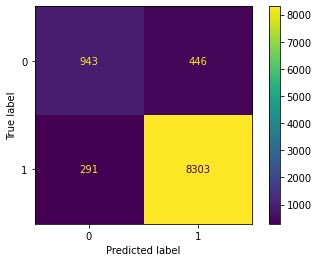

In [22]:
plot_confusion_matrix(logreg,X_test_tfidf,y_test)

In [24]:
print(classification_report(y_test, logreg.predict(X_test_tfidf)))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72      1389
           1       0.95      0.97      0.96      8594

    accuracy                           0.93      9983
   macro avg       0.86      0.82      0.84      9983
weighted avg       0.92      0.93      0.92      9983



### Using Multinomial Naive Bayes

In [18]:
nb = MultinomialNB(alpha = 1) # get object of Multinomial naive bayes model with alpha parameter = 10
nb.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=1)

In [12]:

accuracies = cross_val_score(estimator = nb, X = X_train_tfidf, y = y_train, cv = 5) # do K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation
m = accuracies.mean() # measure the mean accuray of 5 fold cross validation
s = np.std(accuracies)
print('train accuracy: %.3f%% (+/-%.3f)' % (m, s))


train accuracy: 0.942% (+/-0.002)


In [13]:
predictions = nb.predict(X_test_tfidf)
# check the accuracy
print('test accuracy: %.3f' % accuracy_score(y_test, predictions))

test accuracy: 0.882


C:\Users\65915\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


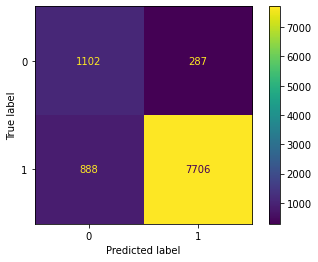

In [25]:
plot_confusion_matrix(nb,X_test_tfidf,y_test)

In [26]:
print(classification_report(y_test, nb.predict(X_test_tfidf)))

              precision    recall  f1-score   support

           0       0.55      0.79      0.65      1389
           1       0.96      0.90      0.93      8594

    accuracy                           0.88      9983
   macro avg       0.76      0.85      0.79      9983
weighted avg       0.91      0.88      0.89      9983



### Using Bernoulli Naive Bayes

In [19]:
Bnb = BernoulliNB(alpha = 10) # get object of Multinomial naive bayes model with alpha parameter = 10
Bnb.fit(X_train_tfidf, y_train)

BernoulliNB(alpha=10)

In [15]:
from sklearn.model_selection import cross_val_score  # import cross_val_score from sklear.model_selection
accuracies = cross_val_score(estimator = Bnb, X = X_train_tfidf, y = y_train, cv = 5) # do K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation
m = accuracies.mean() # measure the mean accuray of 5 fold cross validation
s = np.std(accuracies)
print('train accuracy: %.3f%% (+/-%.3f)' % (m, s))

train accuracy: 0.687% (+/-0.044)


In [16]:
predictions = Bnb.predict(X_test_tfidf)
# check the accuracy
print('test accuracy: %.3f' % accuracy_score(y_test, predictions))

test accuracy: 0.837


C:\Users\65915\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


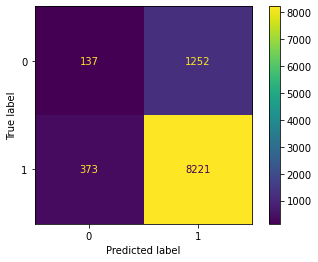

In [27]:
plot_confusion_matrix(Bnb,X_test_tfidf,y_test)

In [28]:
print(classification_report(y_test, Bnb.predict(X_test_tfidf)))

              precision    recall  f1-score   support

           0       0.27      0.10      0.14      1389
           1       0.87      0.96      0.91      8594

    accuracy                           0.84      9983
   macro avg       0.57      0.53      0.53      9983
weighted avg       0.78      0.84      0.80      9983



### Using Linear Support Vector Classifier

In [20]:
svm = LinearSVC(C=10)
svm.fit(X_train_tfidf, y_train)

LinearSVC(C=10)

In [18]:
from sklearn.model_selection import cross_val_score  # import cross_val_score from sklear.model_selection
accuracies = cross_val_score(estimator = svm, X = X_train_tfidf, y = y_train, cv = 5) # do K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation
m = accuracies.mean() # measure the mean accuray of 5 fold cross validation
s = np.std(accuracies)
print('train accuracy: %.3f%% (+/-%.3f)' % (m, s))

train accuracy: 0.990% (+/-0.001)


In [19]:
predictions = svm.predict(X_test_tfidf)
# check the accuracy
print('test accuracy: %.3f' % accuracy_score(y_test, predictions))

test accuracy: 0.927


C:\Users\65915\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


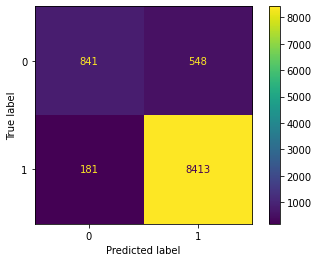

In [29]:
plot_confusion_matrix(svm,X_test_tfidf,y_test)

In [30]:
print(classification_report(y_test, svm.predict(X_test_tfidf)))

              precision    recall  f1-score   support

           0       0.82      0.61      0.70      1389
           1       0.94      0.98      0.96      8594

    accuracy                           0.93      9983
   macro avg       0.88      0.79      0.83      9983
weighted avg       0.92      0.93      0.92      9983



### SVC and Logistic Regression have the highest score, I choose Logisitic Regression because it has slightly better f1-score

In [12]:
words = vectorizer.get_feature_names_out()
feature_coefs = pd.DataFrame(
    data = list(zip(words, logreg.coef_[0])),
    columns = ['feature', 'coef'])
feature_coefs.sort_values(by="coef")

,feature,coef
126428,boring,-19.253952
81056,bad,-17.819669
1332914,waste,-17.303916
929488,poor,-16.262703
323439,disappointing,-14.101866
...,...,...
77155,awesome,15.349855
399205,excellent,15.963049
519296,good,16.882273
731280,love,21.043287


In [13]:
important_features =feature_coefs.sort_values(by="coef")

### Negative words recognised by model

In [14]:
important_features.head(50)

,feature,coef
126428,boring,-19.253952
81056,bad,-17.819669
1332914,waste,-17.303916
929488,poor,-16.262703
323439,disappointing,-14.101866
1223575,terrible,-13.930388
588238,horrible,-13.347931
322843,disappoint,-12.566418
78040,awful,-12.473422
296976,delete,-12.326712


### Positive words recognised by model

In [15]:
important_features.tail(60)

,feature,coef
531987,great game,4.818907
249978,cool,4.848715
479689,fresh,4.884008
1379819,year,4.885914
1131146,solid,4.906854
1306423,ve,4.931801
95962,beat,4.979330
507348,gift,5.076892
485164,fun game,5.169781
1226816,thank,5.176102


In [16]:
important_features.to_csv('sentimental_words.csv')

In [37]:
import matplotlib as mpl

In [38]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)


mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
   
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
        
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

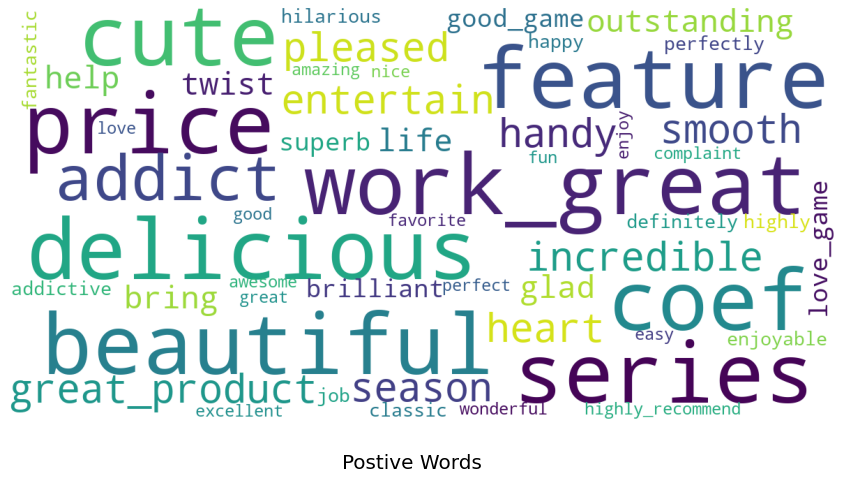

In [39]:
show_wordcloud(important_features.tail(50) , title="Postive Words")

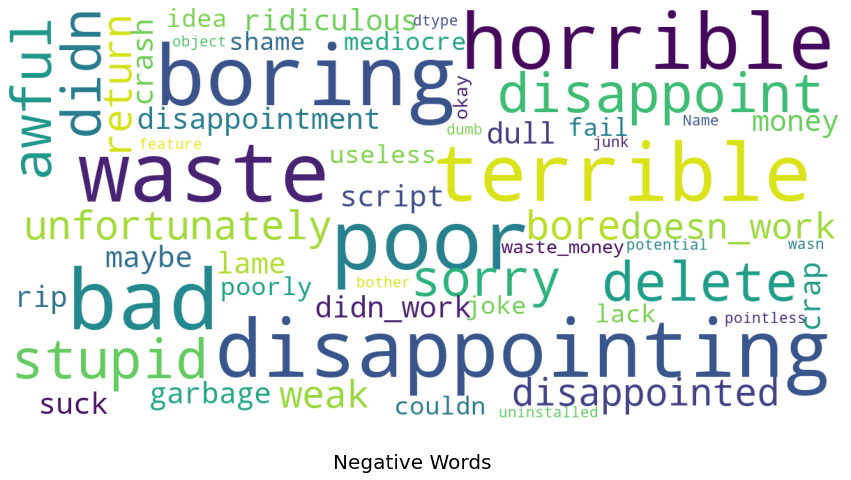

In [40]:
show_wordcloud(important_features['feature'].head(50) , title="Negative Words")

# fill up unlabelled reviews

In [127]:
no_ratings = pd.read_csv('no_ratings.csv')

In [46]:
no_ratings['review'] = no_ratings['review'].apply(lambda x: BeautifulSoup(x,'html.parser').text)

In [47]:
no_ratings['review'] = no_ratings['review_title'] +' ' +no_ratings['review_body']
no_ratings['lang'] = no_ratings['review'].apply(lambda x: nlp(x)._.language)
no_ratings['pred_lang']=no_ratings['lang'].apply(lambda x: x['language'])


In [48]:
no_ratings['pred_lang'].value_counts()

en    5494
de       2
sv       1
da       1
ca       1
so       1
Name: pred_lang, dtype: int64

In [55]:
no_ratings[no_ratings['pred_lang']=='so']

,review_id,product_id,review_title,review_body,review,lang,pred_lang
2778,8605,B001UBB9GM,DEFECTUOSO DE BATERIA,DEFECTUOSO DE BATERIA DEFECTUOSO DE BATERIA DE...,DEFECTUOSO DE BATERIA DEFECTUOSO DE BATERIA DE...,"{'language': 'so', 'score': 0.7142814906387677}",so


In [56]:
no_ratings['review'][2778]

'DEFECTUOSO DE BATERIA DEFECTUOSO DE BATERIA DEFECTUOSO DE BATERIA DEFECTUOSO DE BATERIA DEFECTUOSO DE BATERIA DEFECTUOSO DE BATERIA DEFECTUOSO DE BATERIA DEFECTUOSO DE BATERIA DEFECTUOSO DE BATERIA  DEFECTUOSO DE BATERIA ,,,,,,, ,, , , ,, ,,,,,,,,,,,,,,, ,'

In [57]:
no_ratings['review'] = no_ratings['review'].replace('DEFECTUOSO DE BATERIA DEFECTUOSO DE BATERIA DEFECTUOSO DE BATERIA DEFECTUOSO DE BATERIA DEFECTUOSO DE BATERIA DEFECTUOSO DE BATERIA DEFECTUOSO DE BATERIA DEFECTUOSO DE BATERIA DEFECTUOSO DE BATERIA  DEFECTUOSO DE BATERIA ,,,,,,, ,, , , ,, ,,,,,,,,,,,,,,, ,',
                                                    'DEFECTIVE BATTERY DEFECTIVE BATTERY DEFECTIVE BATTERY DEFECTIVE BATTERY DEFECTIVE BATTERY DEFECTIVE BATTERY DEFECTIVE BATTERY DEFECTIVE BATTERY DEFECTIVE BATTERY DEFECTIVE BATTERY')

In [58]:
no_ratings['review'][2778]

'DEFECTIVE BATTERY DEFECTIVE BATTERY DEFECTIVE BATTERY DEFECTIVE BATTERY DEFECTIVE BATTERY DEFECTIVE BATTERY DEFECTIVE BATTERY DEFECTIVE BATTERY DEFECTIVE BATTERY DEFECTIVE BATTERY'

In [63]:
no_ratings['clean_review']=no_ratings['review'].apply(clean_text)

In [64]:
X = no_ratings['clean_review']
X_tfidf = vectorizer.transform(X)
no_ratings['rating'] = logreg.predict(X_tfidf)

In [101]:
filled_ratings =no_ratings[['review','rating']]

In [111]:
filled_ratings[filled_ratings['rating']==1].sample(20)

,review,rating
398,An irrestibly groovy album Jam metal isn't a g...,1
5005,bought these at the same time as the toothbrus...,1
4134,Love I like to use this on both my Kindle and ...,1
606,Green Mountain coffee is always good. Hazelnut...,1
4777,"Viarir-Wow Solid made pump, works very fast. P...",1
4006,"Looks, not functionality. It did not perform. ...",1
1185,Possibly a lemon This review is from a FINE wo...,1
224,Excellent for kids This movie is great for any...,1
2593,Dog loves it! My Husky is addicted to food. I ...,1
1200,Fails to Provide a Close Shave The Remington F...,1


In [125]:
no_ratings['review'][398]

"An irrestibly groovy album Jam metal isn't a genre that one hears much, but if Clutch is any indication, it has some serious potential.  This album boasts an intense power groove that could easily lead to whiplash from excessive head bobbing.  The title track and &quot;Eight Times Over Miss October&quot; stand out especially.  Each song is led by Tim Sult's grinding, stuttering guitars and Neil Fallon's guttural vocal wail.  The rhythm section backs the songs well with booming bass lines and infectious, propulsive drumbeats.  Clutch excel at making heavy music that is also extremely catchy and groovy, with a jam element that is rare in metal.  For fans looking for a band that rocks like no other, Clutch is a good place to start."

In [98]:
filled_ratings.to_csv('filled_ratings.csv')


In [132]:
task1b=pd.DataFrame(no_ratings['review_id'])
task1b

,review_id
0,1577265
1,774185
2,3722095
3,359962
4,1735617
...,...
5495,1660361
5496,1404529
5497,1343547
5498,1708593


### Answer for task1b! 

In [135]:
task1b['sentiment']=list(filled_ratings['rating'])
task1b['sentiment'] = task1b['sentiment'].replace([1,0],['Positive','Negative'])
task1b.to_csv('task1b.csv')

### Bonus: check result for Spanish and messy reviews

In [2]:
from deep_translator import GoogleTranslator

In [118]:
spanish_senti

,review,sentiment,lang,pred_lang
3387,tremendous game!! The video game is very good;...,1,"{'language': 'es', 'score': 0.9999953440754553}",es
7672,Comment on the DVD Edition of La Que No Podia ...,1,"{'language': 'es', 'score': 0.9999955656252353}",es
9576,What I was missing! Everything is excellent......,1,"{'language': 'es', 'score': 0.9999943014787741}",es
13305,Fun game It is a very fun game that makes you ...,1,"{'language': 'es', 'score': 0.9999940245245635}",es
14432,"Very good. I liked the sports set, of good qua...",1,"{'language': 'es', 'score': 0.9999963013509648}",es
23027,"Very good Very good charger, an excellent idea...",1,"{'language': 'es', 'score': 0.9999953503562862}",es
26929,"Action, emotion and intense reflection Third W...",1,"{'language': 'es', 'score': 0.9999963885142593}",es
27376,I never received the product I cannot evaluate...,0,"{'language': 'es', 'score': 0.9999937138155174}",es
28042,EXCELLENT I am a loyal fan of THE UNTOUCHABLES...,1,"{'language': 'es', 'score': 0.9999975442785618}",es
28072,You are my destiny... This soap opera was a gi...,1,"{'language': 'es', 'score': 0.9999971699483664}",es


### Translate to english because the model only recognised english text

In [3]:
from deep_translator import GoogleTranslator
spanish_senti['review'] = spanish_senti['review'].apply(lambda text: GoogleTranslator(source='auto', target='en').translate(text))

In [120]:
spanish_senti['clean_review']=spanish_senti['review'].apply(clean_text)

<ipython-input-120-ffdcde9e27a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spanish_senti['clean_review']=spanish_senti['review'].apply(clean_text)


In [123]:
X = spanish_senti['clean_review']
y_test = spanish_senti['sentiment']
X_tfidf = vectorizer.transform(X)
predictions = logreg.predict(X_tfidf)

In [124]:
# check the accuracy
print('test accuracy: %.3f' % accuracy_score(y_test, predictions))

test accuracy: 0.947


In [125]:
messy_senti['clean_review']=messy_senti['review'].apply(clean_text)
X = messy_senti['clean_review']
y_test = messy_senti['sentiment']
X_tfidf = vectorizer.transform(X)
predictions = logreg.predict(X_tfidf)

<ipython-input-125-4db2e8194479>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messy_senti['clean_review']=messy_senti['review'].apply(clean_text)


In [126]:
# check the accuracy
print('test accuracy: %.3f' % accuracy_score(y_test, predictions))

test accuracy: 0.958


### The result are surprisingly good!